# Introduction

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOkFwIF09DEVcgunZk_3EPp6FMWcxx8AUDRA&usqp=CAU' height = '600px' width = '600px'>

## Objective: Main aim of this notebook is to find face behind the mask using autoencoder.

## Import Necessary Libraries

In [1]:
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import numpy as np
import os
import re


## Load data
Here I am going to load only 2500 images each with mask and no mask. These images are converted to an array and are appended in empty array. Here I also have defind function to load data serially. 

In [3]:
!pip install opencv-python

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 8.9 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
#EXPERIMENT START

In [9]:
# import cv2
# import numpy as np
# from mtcnn import MTCNN
# import os

# # Load the MTCNN face detection model
# mtcnn_detector = MTCNN()

# # Load the goggle image
# goggle_image = cv2.imread('/kaggle/input/goggle1/Lovepik_com-401380107-summer-sunglasses-artificial-sunglasses.png')

# # Folder path containing seed images
# input_folder = '/kaggle/input/face-mask-lite-dataset/without_mask'

# # Output folder path for processed images
# output_folder = '/kaggle/working/sunglasses_image'

# # Create the output folder if it doesn't exist
# os.makedirs(output_folder, exist_ok=True)

# # Iterate through the images in the input folder
# for i in range(2501):  # Range from 0 to 2500
#     input_path = os.path.join(input_folder, f'seed{i:04d}.png')
#     output_path = os.path.join(output_folder, f'seed{i:04d}_goggled.png')

#     # Load the input image
#     image = cv2.imread(input_path)

# #    Detect faces and eyes using MTCNN
#     faces = mtcnn_detector.detect_faces(image)
#     for face in faces:
#         x, y, w, h = face['box']
#         keypoints = face['keypoints']

#         # Extract eye positions
#         left_eye_x, left_eye_y = keypoints['left_eye']
#         right_eye_x, right_eye_y = keypoints['right_eye']

#         # Calculate goggle size based on eye positions
#         goggle_width = int(np.sqrt((right_eye_x - left_eye_x)**2 + (right_eye_y - left_eye_y)**2) * 2)

#                 # Calculate goggle height based on the goggle width and original aspect ratio
#         goggle_height = int(goggle_width * goggle_image.shape[0] / goggle_image.shape[1])

#                 # Resize the goggle image to fit the eyes
#         resized_goggle = cv2.resize(goggle_image, (goggle_width, goggle_height))

#                 # Calculate goggle position based on eye positions
#         goggle_x = left_eye_x - goggle_width // 3
#         goggle_y = left_eye_y - goggle_height // 2

#                 # Overlay the goggle on the face
#         for i in range(goggle_height):
#             for j in range(goggle_width):
#                 if resized_goggle[i, j, 3] != 0:  # Check for transparency
#                     image[goggle_y + i, goggle_x + j, :] = resized_goggle[i, j, :3]

#     # Save the processed image
#     cv2.imwrite(output_path, image)

# print('Sunglasses effect applied to images.')

IndexError: index 3 is out of bounds for axis 2 with size 3

In [2]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 128

mask_path = '../input/face-mask-lite-dataset/with_mask'
mask_array = []

image_path = '../input/face-mask-lite-dataset/without_mask'
img_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
mask_file = sorted_alphanumeric(os.listdir(mask_path))
for i in tqdm(mask_file):
    #here i have only load 2500 images.
    if i == 'with-mask-default-mask-seed2500.png':
        break
    else:    
        image = cv2.imread(mask_path + '/' + i,1)

          # as opencv load image in bgr format converting it to rgb
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # resizing images 
        image = cv2.resize(image, (SIZE, SIZE))

        # normalizing image 
        image = image.astype('float32') / 255.0

        #appending normal normal image    
        mask_array.append(img_to_array(image))

  
    
for i in tqdm(image_file):
 
    if i == 'seed2500.png':
        break
    
    else:
        image = cv2.imread(image_path + '/' + i,1)

        # as opencv load image in bgr format converting it to rgb
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # resizing images 
        image = cv2.resize(image, (SIZE, SIZE))

        # normalizing image 
        image = image.astype('float32') / 255.0
        # appending normal sketch image
        img_array.append(img_to_array(image))

   
    

 25%|██▌       | 2500/10000 [02:19<06:59, 17.90it/s]


## Plot image pair

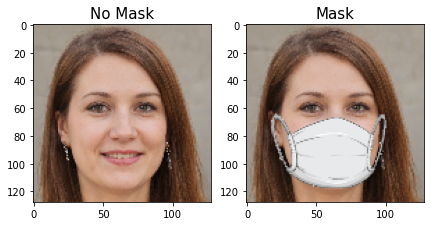

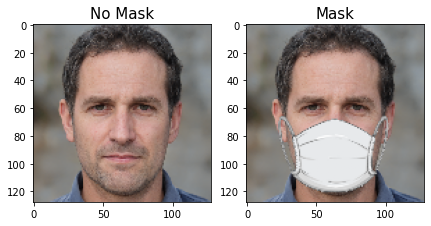

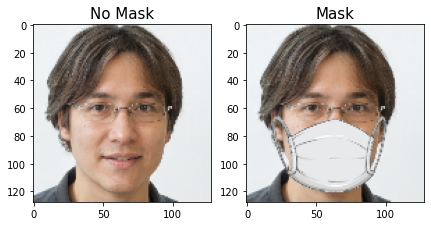

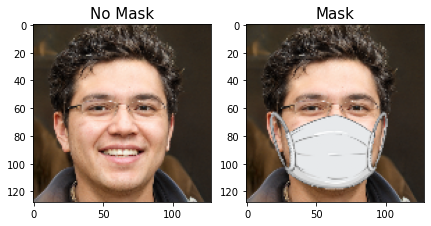

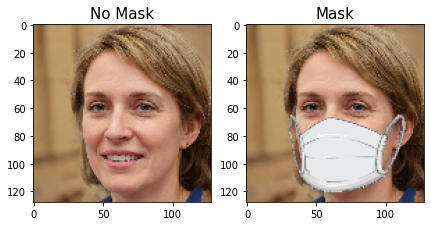

In [9]:
def plot_image_pair(images = 5):
    for i in range(images):
        plt.figure(figsize = (7,7))
        plt.subplot(1,2,1)
        plt.title("No Mask", fontsize = 15)
        plt.imshow(img_array[i].reshape(SIZE, SIZE, 3))
        plt.subplot(1,2,2)
        plt.title("Mask", fontsize = 15)
        plt.imshow(mask_array[i].reshape(SIZE, SIZE, 3))
        
        
        
plot_image_pair(5)
        
        

## Slicing and reshaping
Here i have used 2300 images for training and remaining 200 for testing.

23

In [9]:
train_mask_image = mask_array[:2000]
train_image = img_array[:2000]
test_mask_image = mask_array[2000:]
test_image = img_array[2000:]
# reshaping
train_mask_image = np.reshape(train_mask_image,(len(train_mask_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train no mask image shape:',train_image.shape)
test_mask_image = np.reshape(test_mask_image,(len(test_mask_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test no mask image shape',test_image.shape)

Train no mask image shape: (2000, 128, 128, 3)
Test no mask image shape (500, 128, 128, 3)


## Defining our model

Here I have used Conv2D and MaxPool2D in encoder network for downsampling. Latent vector is of shape (16,16,64). This latent vector is input for decoder network, decoder network tries to reconstruct images and tries to reduce reconstruction loss by upsampling this latent vector.

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define your modified VGG16 model
def modified_vgg16(input_shape=(128, 128, 3)):
    vgg16_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

    # Resize input to 128x128 and add a convolutional layer
    resized_input = Conv2D(32, (3, 3), activation='relu', padding='same')(vgg16_base.layers[0].output)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    
    # Add more convolutional layers or adjust as needed
    
    # Add your custom layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    output = Dense(3, activation='softmax')(x)
    
    model = Model(inputs=vgg16_base.input, outputs=output)
    return model

# Create the modified VGG16 model
modified_vgg16_model = modified_vgg16()

# Print the model summary
modified_vgg16_model.summary()


58892288/58889256 [==============================] - 0s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_______________________________________________________

In [5]:
SIZE=128
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained weights
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(SIZE, SIZE, 3))

# Extract the outputs of specific layers from VGG16
block1_conv1_output = vgg16.get_layer('block1_conv1').output
block1_conv2_output = vgg16.get_layer('block1_conv2').output

# Define your encoder input
encoder_input = keras.Input(shape=(SIZE, SIZE, 3), name="img")

vgg16_model = keras.Model(inputs=vgg16.input, outputs=[block1_conv1_output, block1_conv2_output])

# Get the outputs of the specific layers from the VGG16 model
block1_conv1, block1_conv2 = vgg16_model(encoder_input)

# Combine the VGG16 outputs with your encoder input
combined_input = tf.keras.layers.concatenate([encoder_input, block1_conv1, block1_conv2], axis=-1)


# Continue with your encoder architecture
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(combined_input)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='valid')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
encoder_output = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoder = tf.keras.Model(encoder_input, encoder_output)


# Decoder Architecture with Addition and VGG16 Skip Connections
decoder_input = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(encoder_output)



# Incorporate skip connections from the encoder

# Continue with the rest of your decoder architecture
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=164, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
decoder_output = Conv2D(filters=3, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)

skip_layer_2 = modified_vgg16_model.layers[2].output
skip_layer_1 = modified_vgg16_model.layers[1].output

# Connect the decoder output to the skip layers from the modified VGG16
x = tf.keras.layers.concatenate([decoder_output, skip_layer_2, skip_layer_1], axis=-1)

model = keras.Model(encoder_input, decoder_output)
model.summary()


Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
functional_7 (Functional)       [(None, 128, 128, 64 38720       img[0][0]                        
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 128, 128, 131 0           img[0][0]                        
                                                                 functional_7[0][0]               
                                                                 functional_7[0][1]               
______________________________________________________________________________________

In [11]:
SIZE=128
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained weights
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(SIZE, SIZE, 3))

# Extract the outputs of specific layers from VGG16
block1_conv1_output = vgg16.get_layer('block1_conv1').output
block1_conv2_output = vgg16.get_layer('block1_conv2').output

# Define your encoder input
encoder_input = keras.Input(shape=(SIZE, SIZE, 3), name="img")

vgg16_model = keras.Model(inputs=vgg16.input, outputs=[block1_conv1_output, block1_conv2_output])

# Get the outputs of the specific layers from the VGG16 model
block1_conv1, block1_conv2 = vgg16_model(encoder_input)

# Combine the VGG16 outputs with your encoder input
combined_input = tf.keras.layers.concatenate([encoder_input, block1_conv1, block1_conv2], axis=-1)


# Continue with your encoder architecture
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(combined_input)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='valid')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
encoder_output = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoder = tf.keras.Model(encoder_input, encoder_output)


# Decoder Architecture with Addition and VGG16 Skip Connections
decoder_input = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(encoder_output)



# Incorporate skip connections from the encoder

# Continue with the rest of your decoder architecture
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters=164, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
decoder_output = Conv2D(filters=3, kernel_size=(3, 3), padding='same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)

skip_layer_2 = modified_vgg16_model.layers[2].output
skip_layer_1 = modified_vgg16_model.layers[1].output

# Connect the decoder output to the skip layers from the modified VGG16
x = tf.keras.layers.concatenate([decoder_output, skip_layer_2, skip_layer_1], axis=-1)

model = keras.Model(encoder_input, decoder_output)
model.summary()


NameError: name 'modified_vgg16_model' is not defined

In [4]:
# import tensorflow as tf
# tf.keras.backend.clear_session()
# from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
# from tensorflow.keras import models, layers
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Activation, Flatten, Dense, Input, MaxPooling2D, Add, Reshape, concatenate, AveragePooling2D, Multiply, GlobalAveragePooling2D, UpSampling2D, MaxPool2D,Softmax
# from tensorflow.keras.activations import softmax
# from tensorflow.keras import initializers, regularizers
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Activation, Flatten, Dense, Input, MaxPooling2D, Add, Reshape, concatenate, AveragePooling2D, Multiply, GlobalAveragePooling2D, UpSampling2D, MaxPool2D,Softmax
# input = Input(shape=(128, 128, 3))

# #Noise estimation
# x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(input)
# x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
# x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
# x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
# x = Conv2D(3, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)

# #Non Blind denoising
# x = concatenate([x,input])
# conv1 = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(x)
# conv2 = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv1)

# pool1 = AveragePooling2D(pool_size=(2,2),padding='same')(conv2)
# conv3 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(pool1)
# conv4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv3)
# conv5 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv4)

# pool2 = AveragePooling2D(pool_size=(2,2),padding='same')(conv5)
# conv6 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(pool2)
# conv7 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv6)
# conv8 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv7)
# conv9 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv8)
# conv10 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv9)
# conv11 = Conv2D(256, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv10)

# upsample1 = Conv2DTranspose(128, (3, 3), strides=2, activation="relu", kernel_initializer='he_normal',padding="same")(conv11)
# add1 = Add()([upsample1,conv5])
# conv12 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(add1)
# conv13 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv12)
# conv14 = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv13)

# upsample2 = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", kernel_initializer='he_normal',padding="same")(conv14)
# add1 = Add()([upsample2,conv2])
# conv15 = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(add1)
# conv16 = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal',padding="same")(conv15)

# out = Conv2D(3, (1,1), kernel_initializer='he_normal',padding="same")(conv16)
# out = Add()([out,input])

# CBDNet = Model(input,out)
# CBDNet.compile(optimizer=tf.keras.optimizers.Adam(1e-03), loss=tf.keras.losses.MeanSquaredError())
# CBDNet.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 9248        conv2d_1[0][0]                   
_______________________________________________________________________________________

In [7]:

encoder_input = keras.Input(shape=(SIZE,SIZE, 3), name="img")

x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = MaxPool2D(pool_size = (2,2))(x)

x = Conv2D(filters = 32,kernel_size = (3,3),strides = (2,2), padding = 'valid')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2))(x)

x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

x = Conv2D(filters = 128, kernel_size = (3,3), padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)

x = Conv2D(filters = 128 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
x = Conv2D(filters = 256 , kernel_size = (3,3), padding = 'same')(x) 
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
encoder_output = Conv2D(filters = 512 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

encoder = tf.keras.Model(encoder_input, encoder_output)



decoder_input = Conv2D(filters = 512 ,kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_output)
x = UpSampling2D(size = (2,2))(decoder_input)
x = Conv2D(filters = 256, kernel_size = (3,3),  padding = 'same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 128, kernel_size = (3,3),  padding = 'same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Conv2D(filters = 164, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2,2) )(x)

x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2,2) )(x)
x = Conv2D(filters = 32 , kernel_size = (3,3),  padding = 'same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)
x = UpSampling2D(size = (2,2) )(x) 
x = Conv2D(filters = 16  , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
decoder_output = Conv2D(filters = 3, kernel_size = (3,3), padding = 'same')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LeakyReLU()(x)

# final model
model = keras.Model(encoder_input, decoder_output)
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 31, 31, 32)        4640      
_________________________________________________________________
batch_normalization_22 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)       

In [10]:
SIZE =128
import keras
from matplotlib import pyplot as plt
from keras.layers import Input,Conv2D,MaxPooling2D,Conv2DTranspose
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.merge import concatenate
# from tensorflow.keras.applications import VGG16
def conv2d(input_img,n_filters,size=(3,3),batchnorm=True):
    conv=Conv2D(filters=n_filters,kernel_size=size,kernel_initializer='he_normal',padding='same')(input_img)
    if batchnorm:
        conv=keras.layers.BatchNormalization()(conv)
    conv=keras.layers.Activation('relu')(conv)
    
    conv=Conv2D(filters=n_filters,kernel_size=size,kernel_initializer='he_normal',padding='same')(input_img)
    if batchnorm:
        conv=keras.layers.BatchNormalization()(conv)
    conv=keras.layers.Activation('relu')(conv)
    return conv


def unet_autoencoder(input_img,n_filters=16,dropout=0.1,batchnorm=True):
    #Encoder
    conv1=conv2d(input_img,n_filters*1,size=(3,3),batchnorm=batchnorm)
    pool1=MaxPooling2D((2,2))(conv1)
    pool1=keras.layers.Dropout(dropout)(pool1)
    
    conv2=conv2d(pool1,n_filters*2,size=(3,3),batchnorm=batchnorm)
    pool2=MaxPooling2D((2,2))(conv2)
    pool2=keras.layers.Dropout(dropout)(pool2)
    
    conv3=conv2d(pool2,n_filters*4,size=(3,3),batchnorm=batchnorm)
    pool3=MaxPooling2D((2,2))(conv3)
    pool3=keras.layers.Dropout(dropout)(pool3)
    
    conv4=conv2d(pool3,n_filters*8,size=(3,3),batchnorm=batchnorm)
    print(conv4.shape)
    pool4=MaxPooling2D((2,2))(conv4)
    pool4=keras.layers.Dropout(dropout)(pool4)
    
    conv5=conv2d(pool4,n_filters*16,size=(3,3),batchnorm=batchnorm)
    
    #Decoder
    up6=Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(conv5)
    print(up6.shape)
    up6=concatenate([up6,conv4])
    up6=keras.layers.Dropout(dropout)(up6)
    conv6=conv2d(up6,n_filters*8,size=(3,3),batchnorm=batchnorm)
    
    up7=Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(conv6)
    up7=concatenate([up7,conv3])
    up7=keras.layers.Dropout(dropout)(up7)
    conv7=conv2d(up7,n_filters*4,size=(3,3),batchnorm=batchnorm)
    
    up8=Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(conv7)
    up8=concatenate([up8,conv2])
    up8=keras.layers.Dropout(dropout)(up8)
    conv8=conv2d(up8,n_filters*2,size=(3,3),batchnorm=batchnorm)
    
    up9=Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(conv8)
    up9=concatenate([up9,conv1])
    up9=keras.layers.Dropout(dropout)(up9)
    conv9=conv2d(up9,n_filters*1,size=(3,3),batchnorm=batchnorm)
    
    output = Conv2D(filters = 3, kernel_size = (3,3), padding = 'same',activation='softmax')(conv9)
    model=Model(input_img,output)
    return model
    
    
input_img = Input(shape = (128, 128, 3))   
autoencoder=unet_autoencoder(input_img,n_filters=16,dropout=0.1,batchnorm=True)
autoencoder.compile(loss='mean_squared_error',optimizer=Adam(learning_rate = 0.001),metrics = ['acc'])
autoencoder.summary()
    

(None, 16, 16, 128)
(None, 16, 16, 128)
Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 128, 128, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 128, 128, 16) 64          conv2d_73[0][0]                  
__________________________________________________________________________________________________
activation_37 (Activation)      (None, 128, 128, 16) 0           batch_normalization_45[0][0]     
______________________________________________

In [ ]:

train_autoencoder = autoencoder.fit(train_mask_image, train_image,batch_size=32,epochs=100, verbose=1, validation_data=(test_mask_image, test_image))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_autoencoder.history['acc'], label='Training Accuracy')
plt.plot(train_autoencoder.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_autoencoder.history['loss'], label='Training Loss')
plt.plot(train_autoencoder.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.tight_layout()
plt.show()


Epoch 1/100
63/63 [==============================] - 4s 62ms/step - loss: 0.0657 - acc: 0.7249 - val_loss: 0.0933 - val_acc: 0.8567
Epoch 2/100
63/63 [==============================] - 3s 49ms/step - loss: 0.0602 - acc: 0.8501 - val_loss: 0.0587 - val_acc: 0.8886
Epoch 3/100
63/63 [==============================] - 3s 50ms/step - loss: 0.0598 - acc: 0.8843 - val_loss: 0.0589 - val_acc: 0.8968
Epoch 4/100
63/63 [==============================] - 3s 50ms/step - loss: 0.0596 - acc: 0.9008 - val_loss: 0.0583 - val_acc: 0.9037
Epoch 5/100
63/63 [==============================] - 3s 49ms/step - loss: 0.0595 - acc: 0.9110 - val_loss: 0.0579 - val_acc: 0.9137
Epoch 6/100
63/63 [==============================] - 3s 49ms/step - loss: 0.0595 - acc: 0.9152 - val_loss: 0.0577 - val_acc: 0.9291
Epoch 7/100
63/63 [==============================] - 3s 49ms/step - loss: 0.0594 - acc: 0.9190 - val_loss: 0.0574 - val_acc: 0.9302
Epoch 8/100
63/63 [==============================] - 3s 48ms/step - loss: 0.

## Compiling our model

In [6]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error',
              metrics = ['acc'])

model.fit(train_mask_image, train_image, epochs = 70, verbose = 1)

NameError: name 'train_mask_image' is not defined

## Model evaluation

Epoch 1/30
79/79 [==============================] - 4s 46ms/step - loss: 0.2438 - acc: 0.6905 - val_loss: 0.1909 - val_acc: 0.8605
Epoch 2/30
79/79 [==============================] - 3s 43ms/step - loss: 0.1114 - acc: 0.8309 - val_loss: 0.1772 - val_acc: 0.8578
Epoch 3/30
79/79 [==============================] - 3s 42ms/step - loss: 0.0951 - acc: 0.8334 - val_loss: 0.1678 - val_acc: 0.8553
Epoch 4/30
79/79 [==============================] - 3s 42ms/step - loss: 0.0853 - acc: 0.8354 - val_loss: 0.1498 - val_acc: 0.8541
Epoch 5/30
79/79 [==============================] - 3s 42ms/step - loss: 0.0827 - acc: 0.8396 - val_loss: 0.1083 - val_acc: 0.8564
Epoch 6/30
79/79 [==============================] - 3s 42ms/step - loss: 0.0765 - acc: 0.8407 - val_loss: 0.1023 - val_acc: 0.8638
Epoch 7/30
79/79 [==============================] - 3s 41ms/step - loss: 0.0732 - acc: 0.8450 - val_loss: 0.1138 - val_acc: 0.8671
Epoch 8/30
79/79 [==============================] - 3s 41ms/step - loss: 0.0723 - a

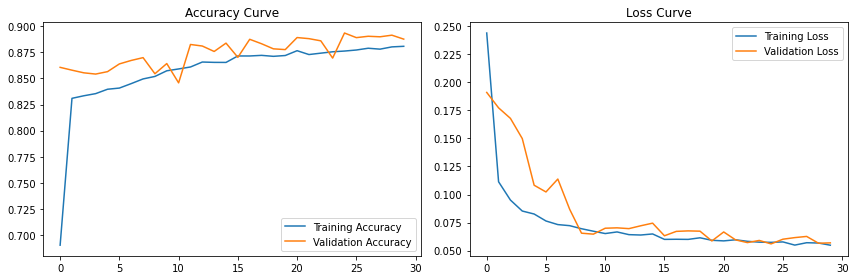

In [15]:
history = model.fit(train_mask_image, train_image, epochs=100, verbose=1, validation_data=(test_mask_image, test_image))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.tight_layout()
plt.show()


In [9]:
loss_acc= autoencoder.evaluate(test_mask_image, test_image)
print("Loss: ",loss_acc[0])
print('Accuracy: ', np.round(loss_acc[1],2) * 100)

16/16 [==============================] - 0s 16ms/step - loss: 9.9613e-04 - acc: 0.9400
Loss:  0.0009961327305063605
Accuracy:  94.0


In [36]:
loss_acc = autoencoder.evaluate(test_mask_image, test_image)
print("Loss:", loss_acc)  # This prints the loss value
print("Accuracy:", np.round(loss_acc * 100, 2))  # This prints the accuracy

10/10 [==============================] - 0s 14ms/step - loss: 0.0012
Loss: 0.0012326054275035858
Accuracy: 0.12


In [10]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Predict images using the trained model
predicted_images = autoencoder.predict(test_mask_image)

# Calculate PSNR and SSIM
psnr_scores = []
ssim_scores = []

for i in range(len(predicted_images)):
    psnr = peak_signal_noise_ratio(test_image[i], predicted_images[i])
    ssim = structural_similarity(test_image[i], predicted_images[i], multichannel=True)
    psnr_scores.append(psnr)
    ssim_scores.append(ssim)

average_psnr = np.mean(psnr_scores)
average_ssim = np.mean(ssim_scores)

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)

Average PSNR: 30.246921090603326
Average SSIM: 0.9532028326009456


In [4]:
from tensorflow.keras.models import load_model

autoencoder_model_path = '/kaggle/input/new-autoencoder/unet_autoencoder_model.h5'
model = load_model(autoencoder_model_path)

## plotting images

In [9]:
def plot_images(start = 0, end = 5):
    for i in range(start, end, 1):
        plt.figure(figsize = (10,10))
        plt.subplot(1,3,1)
        plt.title("orignal image", fontsize = 12)
        plt.imshow(test_image[i])
        plt.subplot(1,3,2)
        plt.title("occluded image", fontsize = 12)
        plt.imshow(test_mask_image[i])
        plt.subplot(1,3,3)
        plt.title("Predicted", fontsize = 12)
        prediction = model.predict(test_mask_image[i].reshape(1,SIZE, SIZE, 3)).reshape(SIZE, SIZE, 3)
        plt.imshow(prediction)
        plt.show()
        

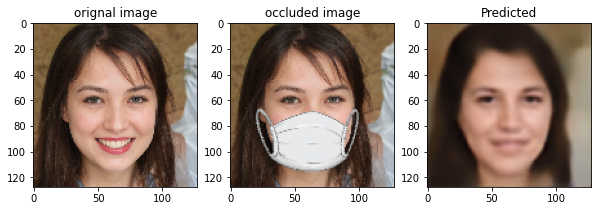

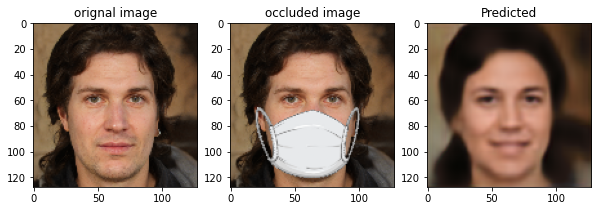

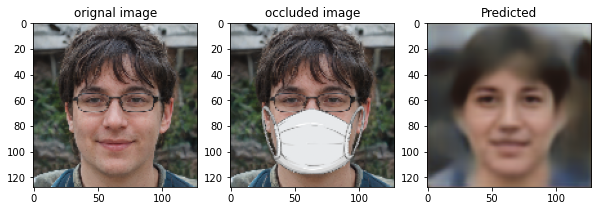

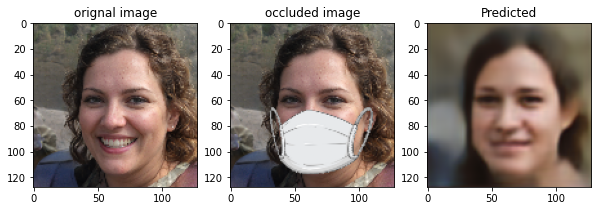

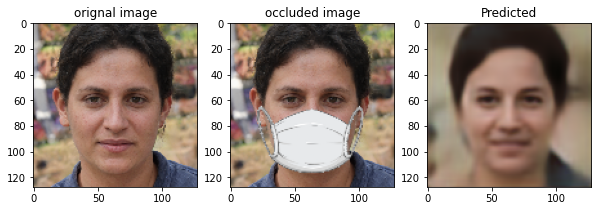

In [10]:
plot_images(5,10)

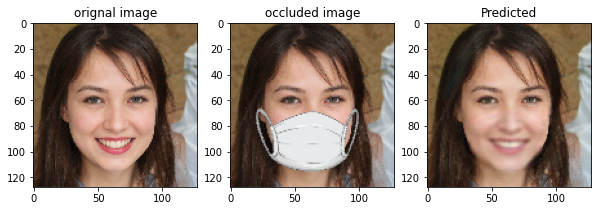

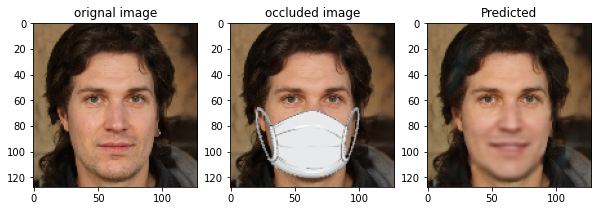

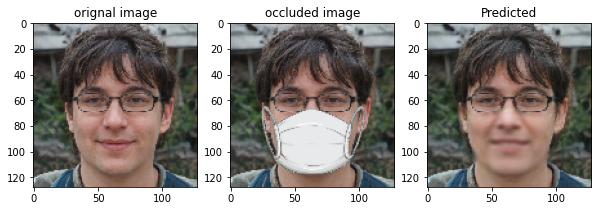

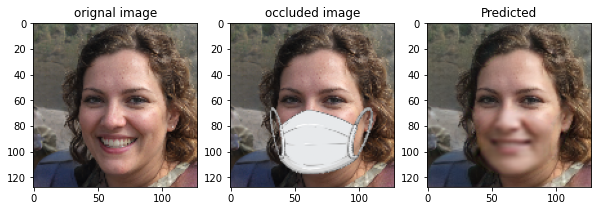

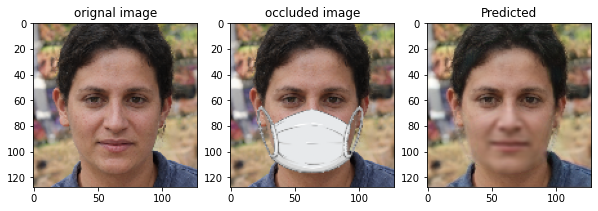

In [12]:
plot_images(28,30)

In [13]:
model.save('unet_autoencoder_model.h5')

In [ ]:
predict = [];
for i in range(len(img_array)):
    predict.append(model.predict(mask_array[i].reshape(1,SIZE, SIZE, 3)).reshape(SIZE, SIZE, 3))
